In [3]:
import os
import shutil
import random

# Original dataset paths
plane_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/plane'
ship_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/ship'

# Paths to split directories
train_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/train'
test_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/test'

# Define split ratio
test_split = 0.2  # 20% for testing

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def split_and_copy_images(class_dir, class_name):
    img_files = os.listdir(class_dir)
    random.shuffle(img_files)
    
    test_count = int(len(img_files) * test_split)
    
    test_files = img_files[:test_count]
    train_files = img_files[test_count:]
    
    # Create class subdirectories in train and test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    for img in train_files:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
    for img in test_files:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

# Split and copy the images
split_and_copy_images(plane_dir, 'plane')
split_and_copy_images(ship_dir, 'ship')

print("Dataset split into train and test sets successfully.")


Dataset split into train and test sets successfully.


Found 358 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.7849 - loss: 0.6099 - val_accuracy: 0.9062 - val_loss: 0.3260
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1674 - val_accuracy: 0.7600 - val_loss: 0.5510
Epoch 3/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.8765 - loss: 0.3438 - val_accuracy: 0.8594 - val_loss: 0.3687
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9062 - loss: 0.3110 - val_accuracy: 0.8800 - val_loss: 0.4066
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.8856 - loss: 0.3044 - val_accuracy: 0.8594 - val_loss: 0.3995
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1670 - val_accuracy: 0.8800 - val_loss: 0.2797
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.8460 - loss: 0.3700 - val_accuracy: 0.8594 - val_loss: 0.3408
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9375 - loss: 0.1925 - val_accuracy: 0.8800 - val_loss: 0.5771
Epoch 9/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.8529 - loss: 0.3253 - val_accuracy: 0.9062 - val_loss: 0.2778
Epoch 10/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9062 - loss: 0.2354 - val_accuracy: 0.7600 - val_loss: 0

Test Accuracy: 81.25%
Model saved successfully.


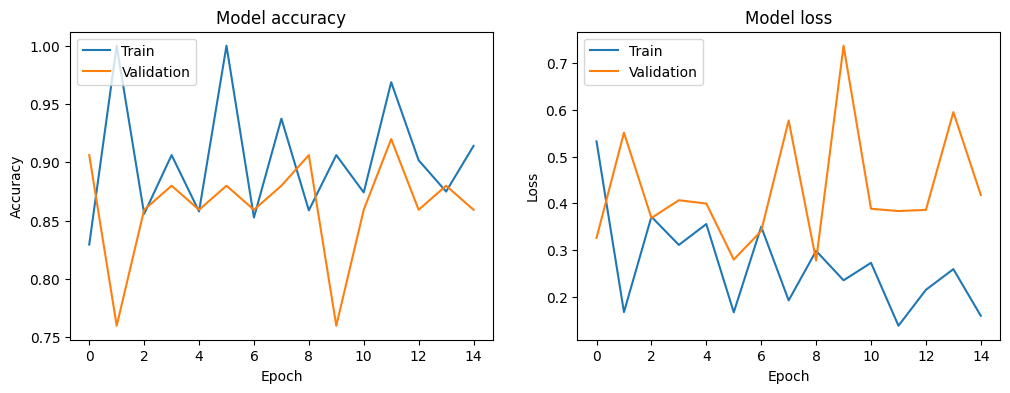

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/train'
test_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/test'

# Image data generator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32  # You can adjust this value as needed

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'  # Ensure this is 'categorical' for multi-class classification
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 output classes for plane and ship
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adjust the learning rate as needed
    loss='categorical_crossentropy',      # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,  # Number of epochs, you can adjust this
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/simple_cnn_model.h5')
print("Model saved successfully.")

# Visualize the training process
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model(r'/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/simple_cnn_model.h5')

# Function to predict if the image is a ship or plane
def classify_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image

    # Make the prediction
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]

    # Map the class index to the corresponding label
    class_labels = {0: 'plane', 1: 'ship'}
    predicted_label = class_labels[class_idx]

    print(f"The image is classified as: {predicted_label}")
    return predicted_label

# Example usage
image_path="/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/plane/plane-40.png"
classify_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The image is classified as: plane


'plane'

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model = tf.keras.models.load_model(r'/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/simple_cnn_model.h5')

# Define the test directory path
test_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/test'

# Create the test data generator
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict the classes for the entire test set
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Print the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(conf_matrix)

# Print the classification report
class_indices = test_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
target_names = [class_labels[k] for k in sorted(class_labels.keys())]

print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))


Found 89 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Confusion Matrix
[[ 1 11]
 [ 2 75]]
Classification Report
              precision    recall  f1-score   support

       plane       0.33      0.08      0.13        12
        ship       0.87      0.97      0.92        77

    accuracy                           0.85        89
   macro avg       0.60      0.53      0.53        89
weighted avg       0.80      0.85      0.81        89



In [9]:
# Define the train directory path
train_dir = '/Users/tharun/Downloads/github/proof/Python/SeabedObjects-Ship-and-Airplane-dataset-master-2/train'

# Create the training data generator
train_datagen = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Print the class indices
print(train_generator.class_indices)


Found 358 images belonging to 2 classes.
{'plane': 0, 'ship': 1}
